# <font color = 'darkblue' > Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#  <font color = 'darkblue' > Data set Description 
This dataset consists of 14 features The target field refers to the presence of heart disease in the patient. 

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [3]:
data = pd.read_csv('heart.csv')

In [3]:
train_heart,test_heart = train_test_split(data, test_size =0.3, random_state = 35)
test_heart.dropna(inplace = True)
test_heart.to_csv('heart_test',index = False)

In [4]:
df = train_heart


In [5]:
df  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0


In [6]:
print(df.shape)# checking the shape of data
print(test_heart.shape)

(212, 14)
(91, 14)


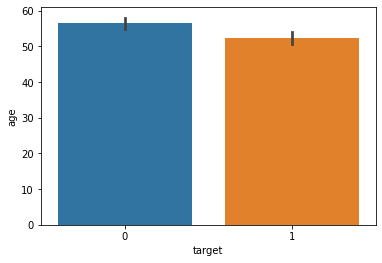

In [7]:
sns.barplot(y = df['age'], x = df['target'])       # this implies that data set is balanced

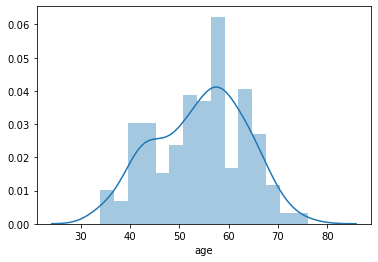

In [8]:
sns.distplot(df.age,bins = 15)

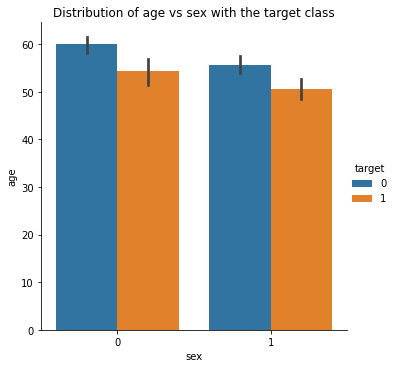

In [9]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [10]:
df.dtypes          # checking the type of data features 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df['target'].value_counts()     # this is a balanced dataset 

1    116
0     96
Name: target, dtype: int64

In [12]:
# checking the null values 
df.isna().sum()             # train data set does not contain nulls 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

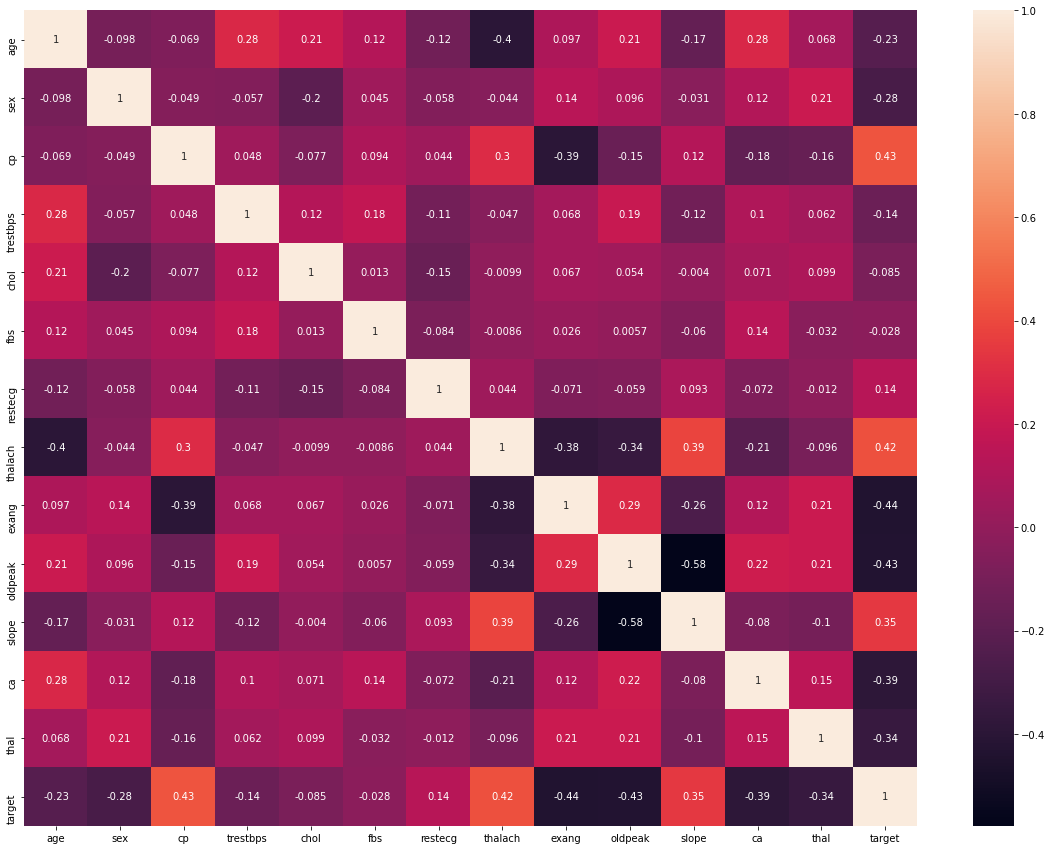

In [13]:
# correlation analysis 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))


sns.heatmap(data.corr(), annot=True)

In [14]:
# cp, thalach, slope are highly correlated with target variable (positive correlatoin)
# exang, oldpeak, ca,thal are negatively correlated with target variable 

### Analysing variable 

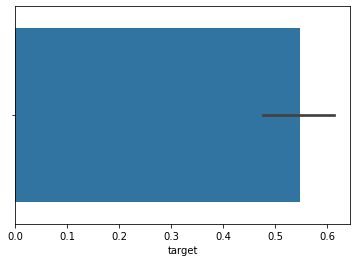

In [15]:
sns.barplot(df.target)   

AxesSubplot(0.125,0.125;0.775x0.755)


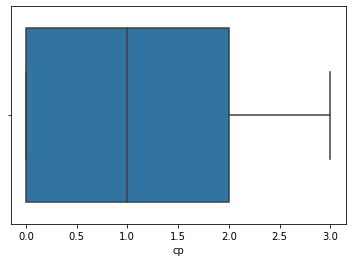

In [16]:
# analysing highly correlated variables 
print(sns.boxplot(df['cp']))          # cp 

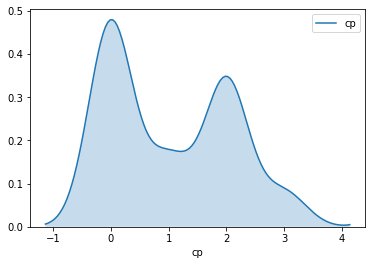

In [17]:
sns.kdeplot(df['cp'],shade = True) 
plt.xlabel('cp')
plt.show()# distribution of cp feature   
# showing the probability density functio

### Categorical conversion 

In [18]:

categories = {0: 'No Heart Pain',1: 'Little Heart Pain',2: 'Heart Pain', 3: 'HighPain'}
df['cp'] = df['cp'].astype('category')
df['cp'] = df['cp'].cat.rename_categories(categories)


sex = {1: 'Male',0: 'Female'}
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.rename_categories(sex)


bloodSugar = {1:'greaterthan or 120',0:'fbs lessthan 120'}
df['fbs'] = df['fbs'].astype('category')
df['fbs'] = df['fbs'].cat.rename_categories(bloodSugar)


recg = {0: 'recg 0',1:'recg 1',2:'recg 2'}
df['restecg'] = df['restecg'].astype('category')
df['restecg'] = df['restecg'].cat.rename_categories(recg)



exang = {1:'exang Yes',0:'No'}
df['exang'] = df['exang'].astype('category')
df['exang'] = df['exang'].cat.rename_categories(exang)


ca = {0:'ca 0', 1: 'ca 1', 2: 'ca 2', 3: 'ca 3',4:'ca 4'}
df['ca'] = df['ca'].astype('category')
df['ca'] = df['ca'].cat.rename_categories(ca)


thal = {0:'thal 0', 1: 'thal 1',2:'thal 2',3: 'thal 3'}
df['thal'] = df['thal'].astype('category')
df['thal'] = df['thal'].cat.rename_categories(thal)

slope = {0: 'slope ST 0', 1: 'slope ST 1', 2: 'slope ST 2'}
df['slope'] = df['slope'].astype('category')
df['slope'] = df['slope'].cat.rename_categories(slope)


### Getting dummies and joining

In [19]:
sex_dummy = pd.get_dummies(df.sex)
merged0 = pd.concat([df,sex_dummy],axis = 'columns')
merged0.drop(['sex', 'Female'],axis = 1,inplace = True)

fbs_dummy = pd.get_dummies(df.fbs)
merged1 = pd.concat([merged0,fbs_dummy],axis = 'columns')
merged1.drop(['fbs', 'greaterthan or 120'],axis = 1,inplace = True)

exang_dummy = pd.get_dummies(df.exang)
merged2 = pd.concat([merged1,exang_dummy],axis = 'columns')
merged2.drop(['exang', 'No'],axis = 1,inplace = True)

cp_dummy = pd.get_dummies(df.cp)
merged3 = pd.concat([merged2,cp_dummy],axis = 'columns')
merged3.drop(['cp', 'HighPain'],axis = 1,inplace = True)

restecg_dummy = pd.get_dummies(df.restecg)
merged4 = pd.concat([merged3,restecg_dummy], axis = 'columns')
merged4.drop(['restecg', 'recg 0'], axis = 1,inplace = True )

ca_dummy = pd.get_dummies(df.ca)
merged5 = pd.concat([merged4,ca_dummy], axis = 'columns')
merged5.drop(['ca', 'ca 0'], axis = 1,inplace = True )

thal_dummy = pd.get_dummies(df.thal)
merged6 = pd.concat([merged5,thal_dummy], axis = 'columns')
merged6.drop(['thal', 'thal 1'], axis = 1,inplace = True )

slope_dummy = pd.get_dummies(df.slope)
merged7 = pd.concat([merged6,slope_dummy], axis = 'columns')
merged7.drop(['slope', 'slope ST 0'], axis = 1,inplace = True )

In [20]:
merged7.head()

,age,trestbps,chol,thalach,oldpeak,target,Male,fbs lessthan 120,exang Yes,No Heart Pain,...,recg 2,ca 1,ca 2,ca 3,ca 4,thal 0,thal 2,thal 3,slope ST 1,slope ST 2
14,58,150,283,162,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12,49,130,266,171,0.6,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
197,67,125,254,163,0.2,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
169,53,140,203,155,3.1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
84,42,102,265,122,0.6,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


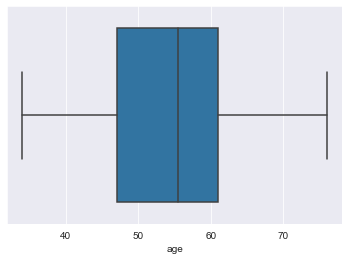

In [21]:
## Analysing age
sns.set_style('darkgrid')
sns.boxplot(df['age'])
plt.show()

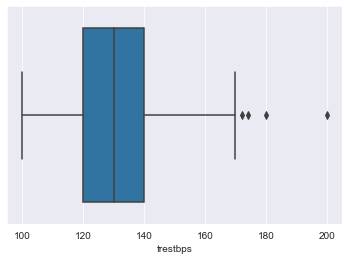

In [22]:
sns.boxplot(df['trestbps'])
plt.show()

In [23]:
df['trestbps'][df.trestbps > 170]  = df['trestbps'].median()            # handling outliers of trestbps

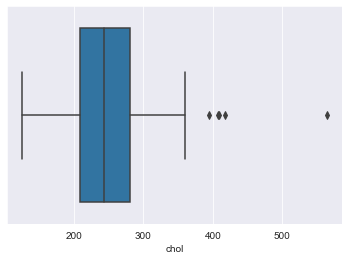

In [24]:
sns.boxplot(df['chol'])
plt.show()

In [25]:
df['chol'][df.chol > 350]  = df['chol'].median()                  # handling outliers of chol feature

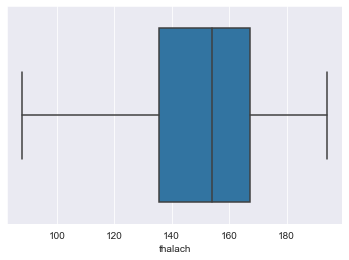

In [26]:
sns.boxplot(df['thalach'])
plt.show()

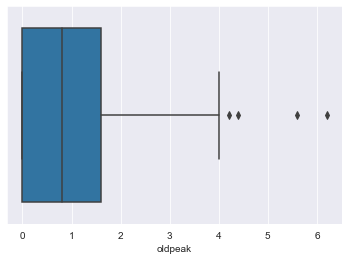

In [27]:
sns.boxplot(df['oldpeak'])
plt.show()

In [28]:
df['oldpeak'][df['oldpeak'] >4] = df['oldpeak'].median()          # handling the outliers of oldpeak feature 

In [29]:
df_num = df[['age','trestbps', 'chol','thalach', 'oldpeak','target']]

# applying scaling techinique
from sklearn.preprocessing import MinMaxScaler
g = df_num.drop('target',axis = 1)
Scaler = MinMaxScaler()
Scaler.fit(g)
m = Scaler.transform(g)
ne = pd.DataFrame(m, columns = g.columns)
ne

,age,trestbps,chol,thalach,oldpeak
0,0.571429,0.714286,0.733645,0.698113,0.250
1,0.357143,0.428571,0.654206,0.783019,0.150
2,0.785714,0.357143,0.598131,0.707547,0.050
3,0.452381,0.571429,0.359813,0.632075,0.775
4,0.190476,0.028571,0.649533,0.320755,0.150
...,...,...,...,...,...
207,0.500000,0.857143,0.761682,0.537736,0.200
208,0.833333,0.571429,0.598131,0.547170,0.500
209,0.476190,0.357143,0.686916,0.603774,0.125
210,0.642857,0.485714,0.504673,0.537736,0.650


In [30]:
# merging scaled data with encoded dataframe 
encoding_df= pd.DataFrame(merged7.iloc[:,5:])
encoding_df.index = list(range(0,212))
final_train = pd.concat([ne,encoding_df], axis = 1)

In [31]:
final_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'Male',
       'fbs lessthan 120', 'exang Yes', 'No Heart Pain', 'Little Heart Pain',
       'Heart Pain', 'recg 1', 'recg 2', 'ca 1', 'ca 2', 'ca 3', 'ca 4',
       'thal 0', 'thal 2', 'thal 3', 'slope ST 1', 'slope ST 2'],
      dtype='object')

# <font color = 'violet'> Model Building 

In [32]:
# loading models from sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


# for the model valuation we need crossvalidation score 
from sklearn.model_selection import cross_val_score

###  <font color = 'darkblue'> Uploading and preparing testing data set 

In [33]:
test = pd.read_csv('heart_test')               # loading dataset

In [34]:
categories = {0: 'No Heart Pain',1: 'Little Heart Pain',2: 'Heart Pain', 3: 'HighPain'}
test['cp'] = test['cp'].astype('category')
test['cp'] = test['cp'].cat.rename_categories(categories)

sex = {1: 'Male',0: 'Female'}
test['sex'] = test['sex'].astype('category')
test['sex'] = test['sex'].cat.rename_categories(sex)

bloodSugar = {1:'greaterthan or 120',0:'fbs lessthan 120'}
test['fbs'] = test['fbs'].astype('category')
test['fbs'] = test['fbs'].cat.rename_categories(bloodSugar)

recg = {0: 'recg 0',1:'recg 1',2:'recg 2'}
test['restecg'] = test['restecg'].astype('category')
test['restecg'] = test['restecg'].cat.rename_categories(recg)

exang = {1:'exang Yes',0:'No'}
test['exang'] = test['exang'].astype('category')
test['exang'] = test['exang'].cat.rename_categories(exang)

ca = {0:'ca 0', 1: 'ca 1', 2: 'ca 2', 3: 'ca 3',4:'ca 4'}
test['ca'] = test['ca'].astype('category')
test['ca'] = test['ca'].cat.rename_categories(ca)


thal = {0:'thal 0', 1: 'thal 1',2:'thal 2',3: 'thal 3'}
test['thal'] = test['thal'].astype('category')
test['thal'] = test['thal'].cat.rename_categories(thal)

slope = {0: 'slope ST 0', 1: 'slope ST 1', 2: 'slope ST 2'}
test['slope'] = test['slope'].astype('category')
test['slope'] = test['slope'].cat.rename_categories(slope)


# getting dummy variables for the features 
sex_dummy = pd.get_dummies(test.sex)
merged0 = pd.concat([test,sex_dummy],axis = 'columns')
merged0.drop(['sex', 'Female'],axis = 1,inplace = True)

fbs_dummy = pd.get_dummies(test.fbs)
merged1 = pd.concat([merged0,fbs_dummy],axis = 'columns')
merged1.drop(['fbs', 'greaterthan or 120'],axis = 1,inplace = True)

exang_dummy = pd.get_dummies(test.exang)
merged2 = pd.concat([merged1,exang_dummy],axis = 'columns')
merged2.drop(['exang', 'No'],axis = 1,inplace = True)

cp_dummy = pd.get_dummies(test.cp)
merged3 = pd.concat([merged2,cp_dummy],axis = 'columns')
merged3.drop(['cp', 'HighPain'],axis = 1,inplace = True)

restecg_dummy = pd.get_dummies(test.restecg)
merged4 = pd.concat([merged3,restecg_dummy], axis = 'columns')
merged4.drop(['restecg', 'recg 0'], axis = 1,inplace = True )

ca_dummy = pd.get_dummies(test.ca)
merged5 = pd.concat([merged4,ca_dummy], axis = 'columns')
merged5.drop(['ca', 'ca 0'], axis = 1,inplace = True )

thal_dummy = pd.get_dummies(test.thal)
merged6 = pd.concat([merged5,thal_dummy], axis = 'columns')
merged6.drop(['thal', 'thal 1'], axis = 1,inplace = True )

slope_dummy = pd.get_dummies(test.slope)
merged7 = pd.concat([merged6,slope_dummy], axis = 'columns')
merged7.drop(['slope', 'slope ST 0'], axis = 1,inplace = True )

#---------------------------------------------------------------------------

# merging encoded and normalised together

dftest_num = test[['age','trestbps', 'chol','thalach', 'oldpeak']]

# applying scaling techinique
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Scaler.fit(dftest_num)
m = Scaler.transform(dftest_num)
me = pd.DataFrame(m, columns = dftest_num.columns)


# merging scaled data with encoded dataframe 
encoding_df_test= pd.DataFrame(merged7.iloc[:,5:])
encoding_df_test.index = list(range(0,91))
final_test = pd.concat([me,encoding_df_test], axis = 1)

## <font color = 'darkblue'>------------------------   Model1: Training    ------------------------------

In [35]:
# training accuracy 

f = ['target','trestbps']
X = final_train.drop(f,axis = 1)
y = final_train['target']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=3)
clf1 = ExtraTreesClassifier()
clf1.fit(X_train,y_train)

ExtraTreesClassifier()

## <font color = 'green'> Model1 Evaluation

###   Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [36]:
# Accuracy in terms of cross validation score
print('training score  = ',clf1.score(X_test,y_test))

crossval_score = cross_val_score(clf1,X,y,cv = 5)

from sklearn.metrics import confusion_matrix
y_preds = clf1.predict(X_test)
# confusion_matrix(y_test,y_preds)
print('mean_crossvalidation (accuracy) = ', crossval_score.mean())

training score  =  0.813953488372093
mean_crossvalidation (accuracy) =  0.8208194905869325


#### Area under the receiver operating characteristic curve (AUC/ROC)
    1.Area under curve (AUC)
    2.ROC Curve
   Roc curves are a comparison of a models true positive rate (tpr) versus a models false positive (fpr)
   
  * True positive = model predicts 1 when truth is 1
  * False positive = model predicts 1 when truth is 0
  * True negative = model predicts 0 when truth is 0 
  * False negative = model predicts 0 when truth is 1

In [37]:
from sklearn.metrics import roc_curve
# make predictions with probaiblities
y_probs = clf1.predict_proba(X_test)          # getting the probabilities of prediction 

y_probs_positive = y_probs[:,1]                # storing probability of getting one ( second columns) 
y_probs[:10],len(y_probs) 

(array([[0.16, 0.84],
        [0.15, 0.85],
        [0.06, 0.94],
        [0.11, 0.89],
        [0.17, 0.83],
        [0.91, 0.09],
        [0.05, 0.95],
        [0.86, 0.14],
        [0.62, 0.38],
        [0.03, 0.97]]),
 43)

In [38]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

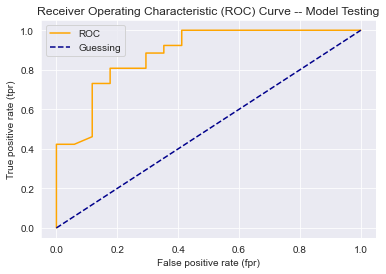

In [39]:
# creating a function for plotting ROC curves 
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    '''
    plots a ROC curve given the false positive rates (fpr)
    and true positive rate (tpr) of a model
    '''
    # plot roc curve 
    plt.plot(fpr,tpr, color = 'orange' , label = 'ROC')
    # Plot line with no predictive power (baseline)
    plt.plot ([0,1],[0,1], color = 'darkblue', linestyle = '--' , label = 'Guessing')
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title ('Receiver Operating Characteristic (ROC) Curve -- Model Testing')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

ROC and AUC, Clearly Explained! by StatQuest

ROC documentation in Scikit-Learn (contains code examples)

How the ROC curve and AUC are calculated by Google's Machine Learning team


In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8834841628959276

#### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actial labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

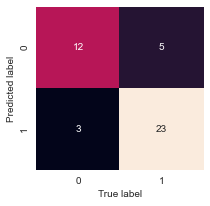

In [41]:
conf_mat = confusion_matrix(y_test,y_preds)
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, # annote the boxes with conf_mat info
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel ('Predicted label')

plot_conf_mat(conf_mat)

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('           Model Training Summary')

print(f'Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test,y_preds)}')
print(f'Recall:{recall_score(y_test,y_preds)}')
print(f'F1: {f1_score(y_test,y_preds)}')


           Model Training Summary
Accuracy : 81.40%
Precision: 0.8214285714285714
Recall:0.8846153846153846
F1: 0.8518518518518519


In [43]:
# printing the classification report
from sklearn.metrics import classification_report
print('        Classication Report- ExtraTreeClassifier')
print('--------------------------------------------------')

print(classification_report(y_test,y_preds))

        Classication Report- ExtraTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.82      0.88      0.85        26

    accuracy                           0.81        43
   macro avg       0.81      0.80      0.80        43
weighted avg       0.81      0.81      0.81        43



## <font color = 'darkblue'>------------------------   Model2: Training    ------------------------------

In [44]:
f = ['target','trestbps','target', 'Male']
X = final_train.drop(f,axis = 1)
y = final_train['target']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=3)
clf =LogisticRegression()
clf.fit(X_train,y_train)
crossval_score = cross_val_score(clf,X,y,cv = 5)

#### Accuracy

In [45]:
# Accuracy in terms of cross validation score
print('training score  = ',clf.score(X_test,y_test))

crossval_score = cross_val_score(clf,X,y,cv = 5)

from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
# confusion_matrix(y_test,y_preds)
print('mean_crossvalidation (accuracy) = ', crossval_score.mean())

training score  =  0.8372093023255814
mean_crossvalidation (accuracy) =  0.8490586932447396


#### ROC Curve

In [46]:
from sklearn.metrics import roc_curve
# make predictions with probaiblities
y_probs = clf.predict_proba(X_test)          # getting the probabilities of prediction 

y_probs_positive = y_probs[:,1]                # storing probability of getting one ( second columns) 
y_probs[:10],len(y_probs) 

(array([[0.21669288, 0.78330712],
        [0.05764078, 0.94235922],
        [0.20796362, 0.79203638],
        [0.03042045, 0.96957955],
        [0.20781531, 0.79218469],
        [0.89245641, 0.10754359],
        [0.06042744, 0.93957256],
        [0.84750162, 0.15249838],
        [0.8127647 , 0.1872353 ],
        [0.0501842 , 0.9498158 ]]),
 43)

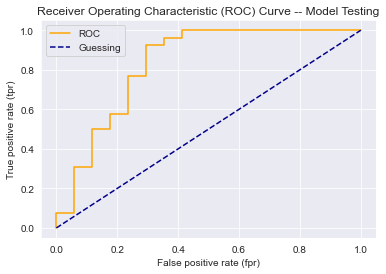

In [47]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)
plot_roc_curve(fpr,tpr)

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.830316742081448

#### Confusion Matrix

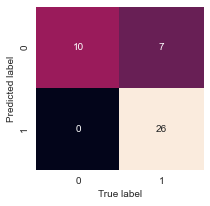

In [49]:
conf_mat = confusion_matrix(y_test,y_preds)
plot_conf_mat(conf_mat)

#### Classification Reports

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f'Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test,y_preds)}')
print(f'Recall:{recall_score(y_test,y_preds)}')
print(f'F1: {f1_score(y_test,y_preds)}')

Accuracy : 83.72%
Precision: 0.7878787878787878
Recall:1.0
F1: 0.8813559322033898


In [51]:
# printing the classification report
from sklearn.metrics import classification_report
print('        Classication Report- LogisticRegression')
print('-------------------------------------------------------')
print(classification_report(y_test,y_preds))

        Classication Report- LogisticRegression
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        17
           1       0.79      1.00      0.88        26

    accuracy                           0.84        43
   macro avg       0.89      0.79      0.81        43
weighted avg       0.87      0.84      0.83        43



## <font color = 'darkblue'> Testing the selected model 
Since the second model resulted in higher accuracy than the first , we select second model as final. 
Next step is to test this final model, with the test data

In [52]:
X = final_test.drop(f,axis = 1)
y = final_test['target']
clf.fit(X,y)
print('testing score = ',clf.score(X,y))
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X)
confusion_matrix(y,y_preds)

testing score =  0.9230769230769231


array([[38,  4],
       [ 3, 46]], dtype=int64)

Model Testing Confusion Matrix


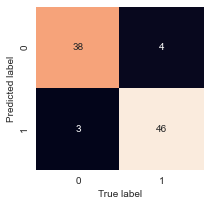

In [53]:
# plotiing confusion matrix 
conf_mat = confusion_matrix(y,y_preds)
print( 'Model Testing Confusion Matrix')
plot_conf_mat(conf_mat)

In [54]:
# classification report for the testing 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f'Accuracy : {accuracy_score(y,y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y,y_preds)}')
print(f'Recall:{recall_score(y,y_preds)}')
print(f'F1: {f1_score(y,y_preds)}')

Accuracy : 92.31%
Precision: 0.92
Recall:0.9387755102040817
F1: 0.9292929292929293


In [55]:
# printing the classification report 
print('     Classification Report - Model Testing ( LogisticRegression)')
print('----------------------------------------------------------------')
print(classification_report(y,y_preds))

     Classification Report - Model Testing ( LogisticRegression)
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.92      0.94      0.93        49

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



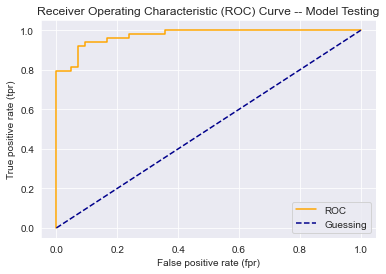

roc_score =  0.9742468415937803


In [56]:
y_probs = clf.predict_proba(X)          # getting the probabilities of prediction 
y_probs_positive = y_probs[:,1]
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y,y_probs_positive)
plot_roc_curve(fpr,tpr)
print('roc_score = ',roc_auc_score(y,y_probs_positive))

## <font color = 'darkblue'> Conclusion

We had one classification problem. The work started with making train and test data. 

Through Exploratory data analysis the relationship among the variables were analysed. For data scaling we used Minmax scalar. 
we tried two algorithms for the model building (ExtraTreeClassifier and LogisticRegression). Among them LogisticRegression yielded high accuracy. So, we selected LogisticRegression and made the predictions.

On testing, Model showed 92.3 % of accuracy.   